# Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
np.random.seed(42)

In [18]:
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Загрузка данных

In [24]:
data = pd.read_csv('data/titanic_train.csv')

In [25]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


# Подготовка данных

In [26]:
data.Age = data.Age.fillna(data.Age.mean())
data['Young'] = data.Age < 18 #новый признак
data['Old'] = data.Age > 55 #новый признак
data['Surname'] = data.Name.apply(lambda x: x.split(',')[0]) #новый признак
data.Name = data.Name.apply(lambda x: x.split(',')[1])
data.Ticket = data.Ticket.fillna("_MISSING_")
data.Fare = data.Fare.fillna(-999)
data.Embarked = data.Embarked.fillna("_MISSING_")
data.Cabin = data.Cabin.fillna("_MISSING_")

In [27]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Young,Old,Surname
0,1,0,3,Mr. Owen Harris,male,22.00,1,0,A/5 21171,7.25,_MISSING_,S,False,False,Braund
1,2,1,1,Mrs. John Bradley (Florence Briggs Thayer),female,38.00,1,0,PC 17599,71.28,C85,C,False,False,Cumings
2,3,1,3,Miss. Laina,female,26.00,0,0,STON/O2. 3101282,7.92,_MISSING_,S,False,False,Heikkinen
3,4,1,1,Mrs. Jacques Heath (Lily May Peel),female,35.00,1,0,113803,53.10,C123,S,False,False,Futrelle
4,5,0,3,Mr. William Henry,male,35.00,0,0,373450,8.05,_MISSING_,S,False,False,Allen


In [29]:
for column in ["Name", "Surname", "Sex", "Embarked", "Ticket", "Cabin", "Young", "Old"]:
    label_encoder = LabelEncoder()
    data[column] = label_encoder.fit_transform(data[column])

In [30]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Young,Old,Surname
0,1,0,3,537,1,22.00,1,0,523,7.25,147,2,0,0,73
1,2,1,1,738,0,38.00,1,0,596,71.28,81,0,0,0,136
2,3,1,3,158,0,26.00,0,0,669,7.92,147,2,0,0,251
3,4,1,1,729,0,35.00,1,0,49,53.10,55,2,0,0,198
4,5,0,3,657,1,35.00,0,0,472,8.05,147,2,0,0,11


# Разбиение датасета на входные данные и целевой признак

In [31]:
X = data.drop(["Survived", "PassengerId"], axis=1) #убираем целевой признак и несущественные признаки
y = data.Survived

In [32]:
X.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Young,Old,Surname
0,3,537,1,22.00,1,0,523,7.25,147,2,0,0,73
1,1,738,0,38.00,1,0,596,71.28,81,0,0,0,136
2,3,158,0,26.00,0,0,669,7.92,147,2,0,0,251
3,1,729,0,35.00,1,0,49,53.10,55,2,0,0,198
4,3,657,1,35.00,0,0,472,8.05,147,2,0,0,11


# Обучение, кластеризация, визуализация и оценка результата

In [33]:
x_transformed = pd.DataFrame(PCA(n_components=2).fit_transform(X)) #понижаем размерность данных до 2-х (для визуализации в 2д пространстве)

In [34]:
k_means = KMeans(n_clusters=2, random_state=42)
agglomerative_clustering = AgglomerativeClustering(n_clusters=4)

In [35]:
scaler = StandardScaler()
X[['Age', 'Fare']] = scaler.fit_transform(X[['Age', 'Fare']])

K-Means silhouette_score = 0.26912329361114246
K-Means davies_bouldin_score = 1.4815837634015914


Agglomerative clustering silhouette_score = 0.2158463454377428
Agglomerative clustering davies_bouldin_score = 1.333991374643872




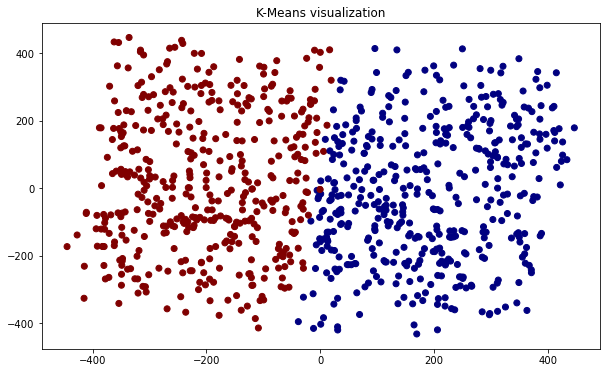

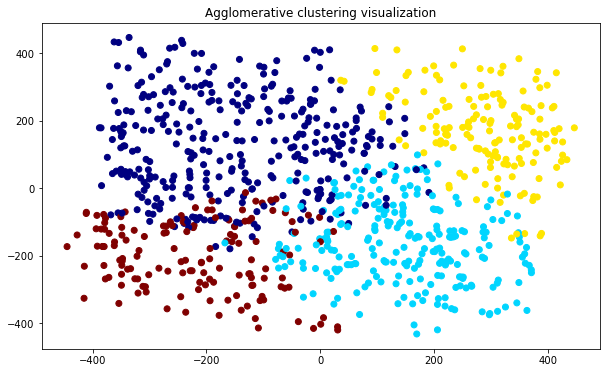

In [36]:
for model, model_name in [(k_means, "K-Means"), (agglomerative_clustering, "Agglomerative clustering")]:
    clusters = model.fit_predict(X)
    print(f"{model_name} silhouette_score = {silhouette_score(X, clusters)}") #измеряет на сколько объект похдодит выбранному кластеру
    print(f"{model_name} davies_bouldin_score = {davies_bouldin_score(X, clusters)}") #мера разброса внутри кластера
    print('\n')
    plt.figure(figsize=(10, 6))
    plt.title(f"{model_name} visualization")
    plt.scatter(x_transformed.iloc[:, 0], x_transformed.iloc[:, 1], c=clusters, cmap="jet")

# Анализ кластеров по статистикам
###### Из анализа получившихся кластеров можно сделать вывод, что на титанике в основном выжили дети, девушки и наболее богатые люди

In [37]:
k_means_clusters = k_means.predict(X)
data.cluster = k_means_clusters

In [39]:
for i in range(2):
    print("Age for cluster {0}: {1}".format(i, data[data.cluster == i].Age.mean()))
    print("Fare for cluster {0}: {1}".format(i, data[data.cluster == i].Fare.mean()))
    print("Children rate for cluster {0}: {1}".format(i, data[(data.cluster == i) & (data.Young == 1)].shape[0] / data[data.cluster==i].shape[0]))
    print("Women rate for cluster {0}: {1}".format(i, data[(data.cluster == i) & (data.Sex == 0)].shape[0] / data[data.cluster==i].shape[0]))
    print("Survived rate for cluster {0}: {1}".format(i, data[(data.cluster == i) & (data.Survived == 1)].shape[0] / data[data.cluster==i].shape[0]))
    print('----------------')

Age for cluster 0: 32.392841855696496
Fare for cluster 0: 29.21175359477126
Children rate for cluster 0: 0.04357298474945534
Women rate for cluster 0: 0.2766884531590414
Survived rate for cluster 0: 0.30501089324618735
----------------
Age for cluster 1: 26.83703567538126
Fare for cluster 1: 35.383690740740676
Children rate for cluster 1: 0.2152777777777778
Women rate for cluster 1: 0.43287037037037035
Survived rate for cluster 1: 0.4675925925925926
----------------
